<a href="https://colab.research.google.com/github/rominicky/diplocssoccomp/blob/main/trabajo_final_TBC2019al2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO INTEGRADOR
# DIPLOMATURA EN CIENCIAS SOCIALES COMPUTACIONALES
#### Estudiantes:
- Romina De León
- Magali Wettstein

In [1]:
!pip install seaborn
!pip install scikit-learn
!pip install KMeans
!pip install geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import geopandas as gpd

  Preparing metadata (setup.py) ... done
  Created wheel for KMeans: filename=kmeans-1.0.2-cp310-cp310-linux_x86_64.whl size=12528 sha256=3d40d25382ee78f3a017c67c48eae545767a17f6a9c15e5464f063626bb18afe
  Stored in directory: /root/.cache/pip/wheels/46/bb/83/beb390fc9fcc845a65a82eb476fc1697e9b8ab5fb795beb220
Successfully built KMeans


In [2]:
!pip install openpyxl

El presente informe tiene por objetivo presentar una evaluación actualizada de la notificación de
casos de Tuberculosis (TB) en Argentina durante el período 2019-2021.
La información utilizada es
resultante de la notificación de casos que se realiza a través del Sistema Nacional de Vigilancia de
la Salud (SNVS 2.0), que permite el reporte individual de los casos por parte de los servicios de salud
a lo largo de todo el país, de manera remota e inmediata.
Para el presente documento se utilizó la información exportada 31 de agosto de 2023 del SNVS
2.0, el cual contiene los casos registrados y validados de 24 jurisdicciones del país para los años 2019,2020 y 2021.

In [3]:
# Cargar el conjunto de datos
fileurl = 'https://github.com/rominicky/diplocssoc/raw/main/TBC-NOTIFICACION_2019al2021.xlsx'
df = pd.read_excel(fileurl)

In [4]:
df.head(10)

,ID_EVENTO,FECHA_APERTURA,SEPI_APERTURA,FECHA_PAPEL,SEXO,NRO_DOC,FECHA_NACIMIENTO,EDAD_DIAGNOSTICO,IDPAISRESIDENCIA,PAIS_RESIDENCIA,...,MODALIDAD_TRAT,ESQUEMA,TRATAMIENTO_2,FECHA_INICIO_TRAT,FECHA_FIN_TRAT,MOTIVO_CONSULTA,CURADO_MEJORADO,FECHA_ALTA_MEDICA,SE_DECLARA_PUEBLO_INDIGENA,ETNIA
0,523546,2019-01-03,1,NaN,F,3235427,1934-03-30 00:00:00,83.0,200.0,Argentina,...,Autoadministrado,NaN,2HRZE / 7 A 10 HR,2019-01-03 00:00:00,NaT,NaN,NaN,NaT,NO,NaN
1,522904,2019-01-02,1,2019-01-02 00:00:00,F,95081135,1996-09-25 00:00:00,22.0,200.0,Argentina,...,Supervisado,NaN,2HRZ / 4HR,2018-12-20 00:00:00,NaT,NaN,NaN,NaT,NO,NaN
2,523705,2019-01-03,1,2018-12-11 00:00:00,F,3051770,1936-02-29 00:00:00,82.0,200.0,Argentina,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NO,NaN
3,530138,2019-01-21,4,2017-11-01 00:00:00,F,30787689,1984-01-08 00:00:00,33.0,200.0,Argentina,...,Supervisado,NaN,2HRZE / 4HR,2017-11-01 00:00:00,2018-06-28,NaN,NaN,NaT,NO,NaN
4,541594,2019-02-13,7,2018-10-18 00:00:00,M,23727232,1974-03-27 00:00:00,44.0,200.0,Argentina,...,Supervisado,NaN,2HRZE / 4HR,2018-10-18 00:00:00,NaT,NaN,NaN,NaT,NO,NaN
5,543489,2019-02-18,8,2019-01-30 00:00:00,F,94271199,2002-08-22 00:00:00,16.0,200.0,Argentina,...,Desconocida,NaN,2HRZE / 4HR,NaN,NaT,NaN,NaN,NaT,NaN,NaN
6,543489,2019-02-18,8,2019-01-30 00:00:00,F,94271199,2002-08-22 00:00:00,16.0,200.0,Argentina,...,Autoadministrado,NaN,2HRZE / 4HR,NaN,NaT,NaN,NaN,NaT,NaN,NaN
7,543489,2019-02-18,8,2019-01-30 00:00:00,F,94271199,2002-08-22 00:00:00,16.0,200.0,Argentina,...,Desconocida,NaN,2HRZE / 4HR,NaN,NaT,NaN,NaN,NaT,NaN,NaN
8,543489,2019-02-18,8,2019-01-30 00:00:00,F,94271199,2002-08-22 00:00:00,16.0,200.0,Argentina,...,Autoadministrado,NaN,2HRZE / 4HR,NaN,NaT,NaN,NaN,NaT,NaN,NaN
9,536838,2019-02-04,6,NaN,M,16747142,1964-06-02 00:00:00,54.0,200.0,Argentina,...,Autoadministrado,NaN,2HRZE / 4HR,2019-02-04 00:00:00,NaT,NaN,NaN,NaT,NO,NaN


## Exploramos el Data Frame
¿Qué columnas tiene?¿Qué tipo de columnas son?

In [5]:
dimension = df.shape
print("Dimension del conjunto de datos:", dimension, "\n")

#Filas
print(f'Cantidad de filas: {df.shape[0]}\n')

#Columnas
print(f'Cantidad de columnas: {df.shape[1]} \n')

# Columnas
columnas = df.columns
print("Columnas:", columnas, "\n")

# Tipos de datos de las columnas
tipos = df.dtypes
print("Tipos de datos:", tipos, "\n")

#Info de datos nulos
nulos = df.info()
print("Valores Nulos:", nulos, "\n")

Dimension del conjunto de datos: (468166, 65) 

Cantidad de filas: 468166

Cantidad de columnas: 65 

Columnas: Index(['ID_EVENTO', 'FECHA_APERTURA', 'SEPI_APERTURA', 'FECHA_PAPEL', 'SEXO',
       'NRO_DOC', 'FECHA_NACIMIENTO', 'EDAD_DIAGNOSTICO', 'IDPAISRESIDENCIA',
       'PAIS_RESIDENCIA', 'ID_PROV_INDEC_RESIDENCIA', 'PROVINCIA_RESIDENCIA',
       'ID_DEPTO_INDEC_RESIDENCIA', 'DEPARTAMENTO_RESIDENCIA',
       'ID_LOC_INDEC_RESIDENCIA', 'LOCALIDAD_RESIDENCIA', 'CALLE_DOMICILIO',
       'NUMERO_DOMICILIO', 'PAIS_NACIMIENTO', 'PERS_PRIV_LIBERTAD',
       'SERVICIO_PENITENCIARIO', 'CLASIFICACION_MANUAL',
       'CLASIFICACION_AUTOMATICA', 'SEPI_SINTOMA', 'FECHA_CONSULTA',
       'SEPI_CONSULTA', 'FECHA_INICIO_SINTOMA', 'EMBARAZADA', 'INTERNADO',
       'FECHA_INTERNACION', 'ID_SNVS_SIGNO_SINTOMA', 'SIGNO_SINTOMA',
       'CLASIFICACION_EXTRAPULMONAR', 'FIS', 'SEPI_MUESTRA', 'FTM',
       'FECHA_ESTUDIO', 'DETERMINACION', 'RESULTADO', 'FECHA_RECEPCION',
       'ID_ESTABLECIMIENTO_DIAG', 

1. Transformación de datos:

Antes de comenzar el análisis, fue necesario realizar algunas transformaciones en los datos, como la conversión de fechas en formatos adecuados, la codificación de variables categóricas (GRUPO EDAD), la eliminación de columnas irrelevantes y el manejo de valores faltantes, el agrega de nuevas columnas con el calculo del tiempo de demora.

In [6]:
# Convertir la columna fechas a tipo de dato datetime y para manejar fechas fuera de rango es utilizar el argumento errors='coerce' al llamar a pd.to_datetime().
df['FECHA_DIAG'] = pd.to_datetime(df['FECHA_DIAG'], errors='coerce')
df['FECHA_PAPEL'] = pd.to_datetime(df['FECHA_PAPEL'], errors='coerce')
df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'], errors='coerce')
df['FECHA_CONSULTA'] = pd.to_datetime(df['FECHA_CONSULTA'], errors='coerce')
df['FECHA_INICIO_SINTOMA'] = pd.to_datetime(df['FECHA_INICIO_SINTOMA'], errors='coerce')
df['FECHA_INTERNACION'] = pd.to_datetime(df['FECHA_INTERNACION'], errors='coerce')
df['FIS'] = pd.to_datetime(df['FIS'], errors='coerce')
df['FTM'] = pd.to_datetime(df['FTM'], errors='coerce')
df['FECHA_ESTUDIO'] = pd.to_datetime(df['FECHA_ESTUDIO'], errors='coerce')
df['FECHA_RECEPCION'] = pd.to_datetime(df['FECHA_RECEPCION'], errors='coerce')
df['FECHA_DIAG'] = pd.to_datetime(df['FECHA_DIAG'], errors='coerce')
df['FECHA_INICIO_TRAT'] = pd.to_datetime(df['FECHA_INICIO_TRAT'], errors='coerce')
df['FECHA_FIN_TRAT'] = pd.to_datetime(df['FECHA_FIN_TRAT'], errors='coerce')

<ipython-input-6-374f4cf52495>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['FECHA_CONSULTA'] = pd.to_datetime(df['FECHA_CONSULTA'], errors='coerce')
<ipython-input-6-374f4cf52495>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['FIS'] = pd.to_datetime(df['FIS'], errors='coerce')
<ipython-input-6-374f4cf52495>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['FTM'] = pd.to_datetime(df['FTM'], errors='coerce')
<ipython-input-6-374f4cf52495>:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. Thi

In [7]:
# Reemplaza los valores faltantes en 'FECHA_DIAG' con los de 'FTM'
df['FECHA_DIAG'].fillna(df['FTM'], inplace=True)

# Reemplaza los valores faltantes en 'FECHA_DIAG' con los de 'FECHA_ESTUDIO'
df['FECHA_DIAG'].fillna(df['FECHA_ESTUDIO'], inplace=True)

# Reemplaza los valores faltantes en 'FECHA_DIAG' con los de 'FECHA_INICIO_TRAT'
df['FECHA_DIAG'].fillna(df['FECHA_INICIO_TRAT'], inplace=True)

# Ahora 'FECHA_DIAG' contiene los valores de 'FTM', 'FECHA_ESTUDIO' o 'FECHA_INICIO_TRAT' en ese orden de prioridad

# Reemplaza los valores faltantes en 'FECHA_PAPEL' con los de 'FECHA_APERTURA'
df['FECHA_PAPEL'].fillna(df['FECHA_APERTURA'], inplace=True)

Eliminar valores faltantes no siempre es la mejor opción, ya que puede resultar en una pérdida de información si hay datos valiosos en otras columnas de las filas eliminadas. En lugar de eliminar las filas con valores faltantes, se reemplaza esos valores con una estimación basada en los datos existentes. Por ejemplo, puedes usar la media, la mediana o algún otro método de imputación.

In [8]:
# Imputar los valores faltantes en 'EDAD_DIAGNOSTICO' con la mediana
median_age = df['EDAD_DIAGNOSTICO'].median()
df['EDAD_DIAGNOSTICO'].fillna(median_age, inplace=True)

In [9]:
# Ordena el DataFrame por 'FECHA_PAPEL' de manera ascendente
df.sort_values(by='FECHA_PAPEL', ascending=True, inplace=True)

# Elimina duplicados basados en todas las columnas excepto 'FECHA_PAPEL'
df.drop_duplicates(subset=df.columns.difference(['FECHA_PAPEL']), keep='first', inplace=True)


AISLAMIENTO SOCIAL PREVENTIVO Y OBLIGATORIO
Decreto 297/2020
DECNU-2020-297-APN-PTE - Disposiciones.
https://www.boletinoficial.gob.ar/detalleAviso/primera/227042/20200320

ARTÍCULO 2º.- Durante la vigencia del “aislamiento social, preventivo y obligatorio”, las personas deberán permanecer en sus residencias habituales o en la residencia en que se encuentren a las 00:00 horas del día 20 de marzo de 2020, momento de inicio de la medida dispuesta.

In [10]:
# Fecha de inicio de la pandemia
fecha_inicio_pandemia = pd.to_datetime('2020-03-20')

# Nueva columna llamada 'CLASIFICACION_PANDEMIA'
# con valores 'Antes' para fechas anteriores a la pandemia y 'Despues' para fechas posteriores o durante la pandemia
df['CLASIFICACION_PANDEMIA'] = df['FECHA_PAPEL'].apply(lambda x: 'Antes' if x < fecha_inicio_pandemia else 'Despues')


In [11]:
categorias_unicas = df['RESULTADO'].unique()
print(categorias_unicas)

['Positivo (+++)' 'Positivo (++)' nan 'Positivo' 'Negativo'
 'Se detecta patrón de bandas específicas' 'Positivo (+)' 'Sensible'
 'Se detecta ADN del complejo Mycobacterium tuberculosis' 'Resistente'
 'Indeterminado'
 'MTB detectado medio, resistencia a rifampicina no detectada'
 'No se detecta mutación' 'Positivo (1 a 19 colonias)'
 'Se detecta mutacion inhA'
 'No se detecta ADN del complejo Mycobacterium tuberculosis'
 'Se detecta mutación rpoB531' 'Contaminado' 'No procesada'
 'MTB detectado, resistencia a rifampicina no detectada'
 'Se detecta mutación katG315' 'En estudio' 'Positiva (contable)'
 'MTB detectado bajo, resistencia a rifampicina no detectada'
 'No se detecta patrón de bandas específicas' 'Se detecta mutacion katG'
 'MTB no detectado' 'MTB detectado, resistencia a rifampicina detectada'
 'MTB detectada. Resist a RIF NO detectada. Resist a INH NO detectada'
 'Se detecta mutacion gyrA' 'Se detecta mutacion rpoB'
 'Se detecta mutación rpoB526'
 'MTB detectado bajo, resist

El Data Frame tiene duplicados porque descarga para cada evento una fila por cada toma de muestra que se envio a analizar para confirmar el evento o como control del tratamiento

In [12]:
base= df.drop_duplicates(subset=['NRO_DOC', 'FECHA_PAPEL','RESULTADO'])

In [13]:
dimension = base.shape
print("Dimension del conjunto de datos:", dimension, "\n")


Dimension del conjunto de datos: (66961, 66) 



In [14]:
#Volvemos a eliminar duplicados segun clasificacion del caso
base= df.drop_duplicates(subset=['NRO_DOC', 'FECHA_PAPEL'])

In [15]:
dimension = base.shape
print("Dimension del conjunto de datos:", dimension, "\n")

Dimension del conjunto de datos: (37596, 66) 



In [16]:
# Extrae el año de notificación
base['ANIO_NOTIFICACION'] = pd.to_datetime(base['FECHA_PAPEL']).dt.year

# Nos quedamos solo con los años 2019-2020-2021
base = base.query('ANIO_NOTIFICACION in [2019, 2020, 2021]')

<ipython-input-16-7b271a95b09d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['ANIO_NOTIFICACION'] = pd.to_datetime(base['FECHA_PAPEL']).dt.year


In [17]:
# Define los límites de los rangos de edad
rangos_edad = [0, 18, 30, 45, 60, float('inf')]

# Define las etiquetas para los grupos de edad
etiquetas_edad = ['0-18', '19-30', '31-45', '46-60', '61+']

# Crea la columna 'GRUPO_EDAD' utilizando la función cut para agrupar las edades
base['GRUPO_EDAD'] = pd.cut(df['EDAD_DIAGNOSTICO'], bins=rangos_edad, labels=etiquetas_edad)

In [18]:
base.head(10)

,ID_EVENTO,FECHA_APERTURA,SEPI_APERTURA,FECHA_PAPEL,SEXO,NRO_DOC,FECHA_NACIMIENTO,EDAD_DIAGNOSTICO,IDPAISRESIDENCIA,PAIS_RESIDENCIA,...,FECHA_INICIO_TRAT,FECHA_FIN_TRAT,MOTIVO_CONSULTA,CURADO_MEJORADO,FECHA_ALTA_MEDICA,SE_DECLARA_PUEBLO_INDIGENA,ETNIA,CLASIFICACION_PANDEMIA,ANIO_NOTIFICACION,GRUPO_EDAD
34298,561497,2019-04-01,14,2019-01-01,M,16366442,1963-01-06,55.0,200.0,Argentina,...,2019-01-10,NaT,NaN,SI,2019-12-23,NO,NaN,Antes,2019,46-60
420640,576578,2019-05-02,18,2019-01-01,F,57057179,2018-07-09,0.0,200.0,Argentina,...,NaT,NaT,NaN,NaN,NaT,NO,NaN,Antes,2019,NaN
455977,630149,2019-08-09,32,2019-01-01,F,32747215,1987-09-05,31.0,200.0,Argentina,...,2019-01-07,2019-08-09,NaN,SI,2019-08-09,NO,NaN,Antes,2019,31-45
30775,578403,2019-05-07,19,2019-01-01,F,94620094,1983-05-06,35.0,200.0,Argentina,...,2018-10-30,2019-11-06,NaN,ND,NaT,NO,NaN,Antes,2019,31-45
458750,632744,2019-08-14,33,2019-01-01,F,25099300,1976-08-20,42.0,200.0,Argentina,...,2019-01-08,2019-10-16,Sintomático Respiratorio,SI,2019-10-16,NO,NaN,Antes,2019,31-45
420798,541171,2019-02-13,7,2019-01-01,M,40178300,1992-01-23,26.0,200.0,Argentina,...,2019-01-07,NaT,NaN,NaN,NaT,NO,NaN,Antes,2019,19-30
20773,564971,2019-04-08,15,2019-01-01,M,94400713,1998-09-20,20.0,200.0,Argentina,...,NaT,NaT,NaN,NaN,NaT,NO,NaN,Antes,2019,19-30
44174,614850,2019-07-16,29,2019-01-01,F,18824808,1980-04-14,38.0,200.0,Argentina,...,NaT,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,31-45
49275,609924,2019-07-04,27,2019-01-01,M,93715886,1966-04-23,52.0,200.0,Argentina,...,2019-01-03,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,46-60
463326,541079,2019-02-13,7,2019-01-01,NaN,900437190,NaT,33.0,200.0,Argentina,...,2019-01-02,NaT,NaN,NaN,NaT,NaN,NaN,Antes,2019,31-45


In [19]:
# Calcula el tiempo de demora en días (puede ajustarse a otra unidad de tiempo)
#base['TIEMPO_DEMORA'] = (base['FECHA_DIAG'] - base['FECHA_INICIO_SINTOMA']).dt.days

# primero hago la diferencia entre 'FECHA_DIAG' y 'FECHA_INICIO_SINTOMA'
base['TIEMPO_DEMORA'] = (base['FECHA_DIAG'] - base['FECHA_INICIO_SINTOMA']).dt.days
base['TIEMPO_DEMORA_TTO'] = (base['FECHA_FIN_TRAT'] - base['FECHA_INICIO_TRAT']).dt.days

# ahora calculo la media de los valores no negativos
media_tiempo_demora = base[base['TIEMPO_DEMORA'] >= 0]['TIEMPO_DEMORA'].mean()
media_tiempo_demora_tto = base[base['TIEMPO_DEMORA_TTO'] >= 0]['TIEMPO_DEMORA_TTO'].mean()
# para los valores negativos reemplazo por la media
base['TIEMPO_DEMORA'] = base['TIEMPO_DEMORA'].apply(lambda x: x if x >= 0 else media_tiempo_demora)
base['TIEMPO_DEMORA_TTO'] = base['TIEMPO_DEMORA_TTO'].apply(lambda x: x if x >= 0 else media_tiempo_demora_tto)

In [20]:
print(base['TIEMPO_DEMORA'].head())

34298     333.000000
420640     37.292168
455977     37.292168
30775      18.000000
458750     37.292168
Name: TIEMPO_DEMORA, dtype: float64


In [21]:
print(base['TIEMPO_DEMORA_TTO'].head())

34298     205.454299
420640    205.454299
455977    214.000000
30775     372.000000
458750    281.000000
Name: TIEMPO_DEMORA_TTO, dtype: float64



2. Análisis descriptivo:
- Resumen estadístico de variables numéricas (edad, tiempo de diagnóstico, etc.).
- Distribuciones de variables categóricas (sexo, país de residencia, localidad, clasificacion del caso, resultado de tratamiento etc.).
- Gráficos de dispersión para identificar tendencias.
- Histogramas para visualizar la distribución de la edad de diagnóstico antes y después de la pandemia.
- Box plots para identificar valores atípicos.
-Análisis de correlación para determinar relaciones entre variables.

Si hizo una descripción de las variables tipo objeto, la cantidad de filas que tienen el dato (count) cantidad de valores unicos dentro de cada variable(unique) la categoria que se aparece con mayor frecuencia y la cantidad de veces que aparece (top y freq)
## De este analisis podemos ver que conviene quedarnos solo con las variable del tipo obejto que son:????

In [22]:
base.describe(include=['O'])


,SEXO,NRO_DOC,PAIS_RESIDENCIA,PROVINCIA_RESIDENCIA,ID_DEPTO_INDEC_RESIDENCIA,DEPARTAMENTO_RESIDENCIA,ID_LOC_INDEC_RESIDENCIA,LOCALIDAD_RESIDENCIA,CALLE_DOMICILIO,NUMERO_DOMICILIO,...,RESULTADO_TRATAMIENTO,CLASIF_INICIO_TRAT,MODALIDAD_TRAT,ESQUEMA,TRATAMIENTO_2,MOTIVO_CONSULTA,CURADO_MEJORADO,SE_DECLARA_PUEBLO_INDIGENA,ETNIA,CLASIFICACION_PANDEMIA
count,36391,36448,34565,36302,36448,35281,36202,36202,34753,28725,...,29590,28857,29590,1187,29590,1795,6691,11701,202,36448
unique,4,34031,5,25,484,409,1348,1576,19631,5733,...,7,6,4,862,6,4,3,2,14,2
top,M,24730799,Argentina,Buenos Aires,6427,Capital,,*SIN DATO* (*SIN DATO*),0,0,...,Tratamiento completo,Nuevo,Autoadministrado,3HZRSE/5HRE,2HRZE / 4HR,Sintomático Respiratorio,SI,NO,Wichí,Despues
freq,20503,6,34552,18848,2176,2774,9718,9718,332,4638,...,11404,25333,14084,48,18917,1492,4426,11413,70,20377


In [23]:
df.columns

Index(['ID_EVENTO', 'FECHA_APERTURA', 'SEPI_APERTURA', 'FECHA_PAPEL', 'SEXO',
       'NRO_DOC', 'FECHA_NACIMIENTO', 'EDAD_DIAGNOSTICO', 'IDPAISRESIDENCIA',
       'PAIS_RESIDENCIA', 'ID_PROV_INDEC_RESIDENCIA', 'PROVINCIA_RESIDENCIA',
       'ID_DEPTO_INDEC_RESIDENCIA', 'DEPARTAMENTO_RESIDENCIA',
       'ID_LOC_INDEC_RESIDENCIA', 'LOCALIDAD_RESIDENCIA', 'CALLE_DOMICILIO',
       'NUMERO_DOMICILIO', 'PAIS_NACIMIENTO', 'PERS_PRIV_LIBERTAD',
       'SERVICIO_PENITENCIARIO', 'CLASIFICACION_MANUAL',
       'CLASIFICACION_AUTOMATICA', 'SEPI_SINTOMA', 'FECHA_CONSULTA',
       'SEPI_CONSULTA', 'FECHA_INICIO_SINTOMA', 'EMBARAZADA', 'INTERNADO',
       'FECHA_INTERNACION', 'ID_SNVS_SIGNO_SINTOMA', 'SIGNO_SINTOMA',
       'CLASIFICACION_EXTRAPULMONAR', 'FIS', 'SEPI_MUESTRA', 'FTM',
       'FECHA_ESTUDIO', 'DETERMINACION', 'RESULTADO', 'FECHA_RECEPCION',
       'ID_ESTABLECIMIENTO_DIAG', 'ESTABLECIMIENTO_DIAG', 'ID_LOC_INDEC_DIAG',
       'LOCALIDAD_DIAG', 'ANTECEDENTE_EPIDEMIOLOGICO',
       'TIPO

In [24]:
# estadísticas descriptivas
descripcion = base[['TIEMPO_DEMORA', 'EDAD_DIAGNOSTICO', 'TIEMPO_DEMORA_TTO']].describe()

print(descripcion)

       TIEMPO_DEMORA  EDAD_DIAGNOSTICO  TIEMPO_DEMORA_TTO
count   36448.000000      36448.000000       36448.000000
mean       37.292168         37.117208         205.454299
std       281.478162         21.554296         102.475778
min         0.000000       -944.000000           0.000000
25%         0.000000         23.000000         205.454299
50%        37.292168         34.000000         205.454299
75%        37.292168         50.000000         205.454299
max     43851.000000        919.000000        9919.000000


se puede ver que hay valores negativos...no deberia los investigamos
## tomar decision de que hacer los eliminamos?
modifique antes para eliminar el error negativo en tiempo demora

In [25]:
# Contar cuántos valores negativos hay en 'TIEMPO_DEMORA'
valores_negativos_tiempo = (base['TIEMPO_DEMORA'] < 0).sum()

# Contar cuántos valores negativos hay en 'EDAD'
valores_negativos_edad = (base['EDAD_DIAGNOSTICO'] < 0).sum()

# Contar cuántos valores mayores de 90 años hay en 'EDAD'
valores_negativos_edad_90 = (base['EDAD_DIAGNOSTICO'] > 90).sum()

# Contar cuántos valores extremos tiempo demora diagnostico 365 días
valores_demora_emayor_365 = (base['TIEMPO_DEMORA'] > 365).sum()

# Contar cuántos valores extremos tiempo demora diagnostico 365 días
valores_demora_tratamiento_365 = (base['TIEMPO_DEMORA_TTO'] > 365).sum()

print(f'Valores negativos en TIEMPO_DEMORA: {valores_negativos_tiempo}')
print(f'Valores negativos en EDAD: {valores_negativos_edad}')
print(f'Valores negativos en EDAD mayor a 90: {valores_negativos_edad_90}')
print(f'Valores negativos en demora diagnostico mayor 365: {valores_demora_emayor_365}')
print(f'Valores negativos demora completar tto mayor a 365: {valores_demora_tratamiento_365}')

Valores negativos en TIEMPO_DEMORA: 0
Valores negativos en EDAD: 8
Valores negativos en EDAD mayor a 90: 39
Valores negativos en demora diagnostico mayor 365: 378
Valores negativos demora completar tto mayor a 365: 1096


Eliminamos valores atipicos

In [26]:
base = base.drop(base[base['EDAD_DIAGNOSTICO'] > 90].index)
base = base.drop(base[base['EDAD_DIAGNOSTICO'] < 0].index)
base = base.drop(base[base['TIEMPO_DEMORA'] > 365].index)
base = base.drop(base[base['TIEMPO_DEMORA_TTO'] > 365].index)

In [27]:
dimension = base.shape
print("Dimension del conjunto de datos:", dimension, "\n")


Dimension del conjunto de datos: (34951, 70) 



In [28]:
# estadísticas descriptivas
descripcion = base[['TIEMPO_DEMORA', 'EDAD_DIAGNOSTICO', 'TIEMPO_DEMORA_TTO']].describe()

print(descripcion)

       TIEMPO_DEMORA  EDAD_DIAGNOSTICO  TIEMPO_DEMORA_TTO
count   34951.000000      34951.000000       34951.000000
mean       28.487777         37.153844         197.073598
std        37.651860         18.717579          59.286628
min         0.000000          0.000000           0.000000
25%         0.000000         23.000000         205.000000
50%        37.292168         34.000000         205.454299
75%        37.292168         51.000000         205.454299
max       365.000000         90.000000         365.000000


In [29]:
valores_negativos_edad = base[base['EDAD_DIAGNOSTICO'] > 91]
valores_negativos_edad

,ID_EVENTO,FECHA_APERTURA,SEPI_APERTURA,FECHA_PAPEL,SEXO,NRO_DOC,FECHA_NACIMIENTO,EDAD_DIAGNOSTICO,IDPAISRESIDENCIA,PAIS_RESIDENCIA,...,MOTIVO_CONSULTA,CURADO_MEJORADO,FECHA_ALTA_MEDICA,SE_DECLARA_PUEBLO_INDIGENA,ETNIA,CLASIFICACION_PANDEMIA,ANIO_NOTIFICACION,GRUPO_EDAD,TIEMPO_DEMORA,TIEMPO_DEMORA_TTO


In [30]:
# Compruebo si se realizo bien el cambio
valores_negativos = base[base['EDAD_DIAGNOSTICO'] < 0]

# Hago un if para que se actualizo bien
if valores_negativos.empty:
    print("Todos los valores negativos en 'EDAD_DIAGNOSTICO' se han actualizado correctamente.")
else:
    print("Aún quedan valores negativos en 'EDAD_DIAGNOSTICO'. Revisa la actualización.")


Todos los valores negativos en 'EDAD_DIAGNOSTICO' se han actualizado correctamente.


In [31]:
base.head(10)

,ID_EVENTO,FECHA_APERTURA,SEPI_APERTURA,FECHA_PAPEL,SEXO,NRO_DOC,FECHA_NACIMIENTO,EDAD_DIAGNOSTICO,IDPAISRESIDENCIA,PAIS_RESIDENCIA,...,MOTIVO_CONSULTA,CURADO_MEJORADO,FECHA_ALTA_MEDICA,SE_DECLARA_PUEBLO_INDIGENA,ETNIA,CLASIFICACION_PANDEMIA,ANIO_NOTIFICACION,GRUPO_EDAD,TIEMPO_DEMORA,TIEMPO_DEMORA_TTO
34298,561497,2019-04-01,14,2019-01-01,M,16366442,1963-01-06,55.0,200.0,Argentina,...,NaN,SI,2019-12-23,NO,NaN,Antes,2019,46-60,333.000000,205.454299
420640,576578,2019-05-02,18,2019-01-01,F,57057179,2018-07-09,0.0,200.0,Argentina,...,NaN,NaN,NaT,NO,NaN,Antes,2019,NaN,37.292168,205.454299
455977,630149,2019-08-09,32,2019-01-01,F,32747215,1987-09-05,31.0,200.0,Argentina,...,NaN,SI,2019-08-09,NO,NaN,Antes,2019,31-45,37.292168,214.000000
458750,632744,2019-08-14,33,2019-01-01,F,25099300,1976-08-20,42.0,200.0,Argentina,...,Sintomático Respiratorio,SI,2019-10-16,NO,NaN,Antes,2019,31-45,37.292168,281.000000
420798,541171,2019-02-13,7,2019-01-01,M,40178300,1992-01-23,26.0,200.0,Argentina,...,NaN,NaN,NaT,NO,NaN,Antes,2019,19-30,37.292168,205.454299
20773,564971,2019-04-08,15,2019-01-01,M,94400713,1998-09-20,20.0,200.0,Argentina,...,NaN,NaN,NaT,NO,NaN,Antes,2019,19-30,7.000000,205.454299
44174,614850,2019-07-16,29,2019-01-01,F,18824808,1980-04-14,38.0,200.0,Argentina,...,NaN,NaN,NaT,NaN,NaN,Antes,2019,31-45,37.292168,205.454299
49275,609924,2019-07-04,27,2019-01-01,M,93715886,1966-04-23,52.0,200.0,Argentina,...,NaN,NaN,NaT,NaN,NaN,Antes,2019,46-60,0.000000,205.454299
463326,541079,2019-02-13,7,2019-01-01,NaN,900437190,NaT,33.0,200.0,Argentina,...,NaN,NaN,NaT,NaN,NaN,Antes,2019,31-45,37.292168,205.454299
217218,573145,2019-04-25,17,2019-01-02,M,17025428,1964-08-24,54.0,200.0,Argentina,...,NaN,NaN,NaT,NO,NaN,Antes,2019,46-60,0.000000,350.000000


In [58]:
print(base['PROVINCIA_RESIDENCIA'].head(50))

34298            Chaco
420640           Chaco
455977           Chaco
458750      Corrientes
420798           Chaco
20773             CABA
44174            Salta
49275     Buenos Aires
463326    Buenos Aires
217218        Santa Fe
206023    Buenos Aires
218688        Misiones
210077    Buenos Aires
214629    Buenos Aires
210079    Buenos Aires
260402        Santa Fe
467755    Buenos Aires
261100        Santa Fe
17255            Chaco
288873        San Juan
260717        Santa Fe
17682     Buenos Aires
17216     Buenos Aires
417858    Buenos Aires
18108         Santa Fe
240969    Buenos Aires
1         Buenos Aires
219262        Misiones
205017    Buenos Aires
205959    Buenos Aires
204175    Buenos Aires
204201    Buenos Aires
204205    Buenos Aires
204340    Buenos Aires
197946    Buenos Aires
197947    Buenos Aires
198059    Buenos Aires
198078    Buenos Aires
200181    Buenos Aires
201182    Buenos Aires
201200    Buenos Aires
201539    Buenos Aires
204128    Buenos Aires
204130    B

In [69]:
base.type

AttributeError: ignored

In [63]:
base = base['PROVINCIA_RESIDENCIA'].replace('CABA', 'Ciudad Autónoma de Buenos Aires')

KeyError: ignored

# Hacemos una serie de graficos y tablas para interpretar los datos

> Bloque con sangría



In [32]:
# Convierte la columna 'ANIO_NOTIFICACION' a formato datetime
base['ANIO_NOTIFICACION'] = pd.to_datetime(base['ANIO_NOTIFICACION'], format='%Y')

# Luego, puedes agrupar por año y momento de diagnóstico
tabla_agrupada = base.groupby([base['ANIO_NOTIFICACION'].dt.year, 'CLASIFICACION_PANDEMIA']).size().unstack(fill_value=0)

# Cambia los nombres de las columnas para mayor claridad
tabla_agrupada.columns = ['Antes de la pandemia', 'Después de la pandemia']

# Resetea el índice para tener una tabla con las columnas 'Año', 'Antes de la pandemia' y 'Después de la pandemia'
tabla_agrupada = tabla_agrupada.reset_index()

# Cambia el nombre de la columna del año
tabla_agrupada = tabla_agrupada.rename(columns={'ANIO_NOTIFICACION': 'Año'})

# Imprime la tabla agrupada
print(tabla_agrupada)

    Año  Antes de la pandemia  Después de la pandemia
0  2019                 12572                       0
1  2020                  2790                    7689
2  2021                     0                   11900


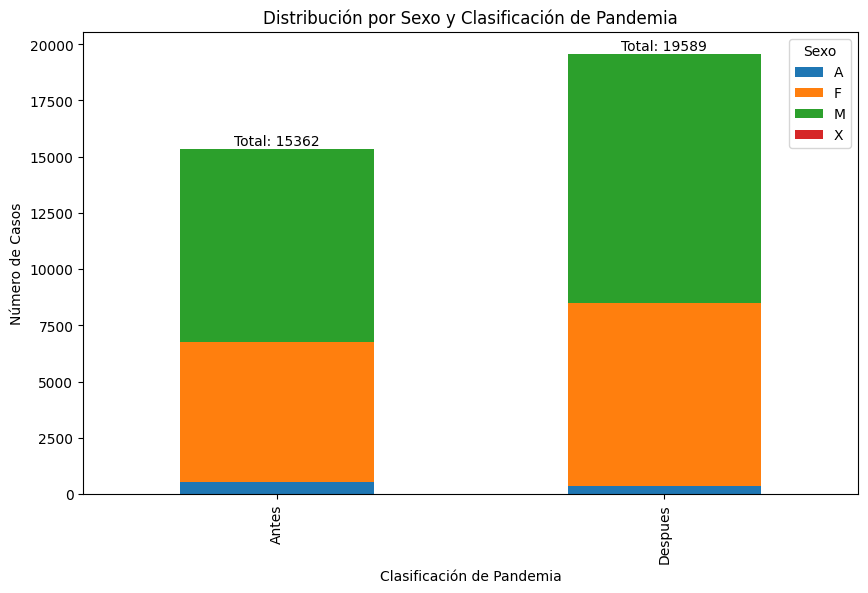

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# Agrupa los datos por 'SEXO' y 'CLASIFICACION_PANDEMIA', y cuenta el número de casos en cada grupo
grupo_distribucion = base.groupby(['CLASIFICACION_PANDEMIA', 'SEXO']).size().unstack(fill_value=0)

# Calcula el total de casos por sexo
total_por_sexo = base.groupby('CLASIFICACION_PANDEMIA').size()

# Crea un gráfico de barras apiladas
ax = grupo_distribucion.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configura las etiquetas y el título del gráfico
plt.xlabel('Clasificación de Pandemia')
plt.ylabel('Número de Casos')
plt.title('Distribución por Sexo y Clasificación de Pandemia')

# Agrega una leyenda
plt.legend(title='Sexo')

# Muestra el total de casos por sexo en la parte superior de las barras
for i, total in enumerate(total_por_sexo):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

# Muestra el gráfico
plt.show()


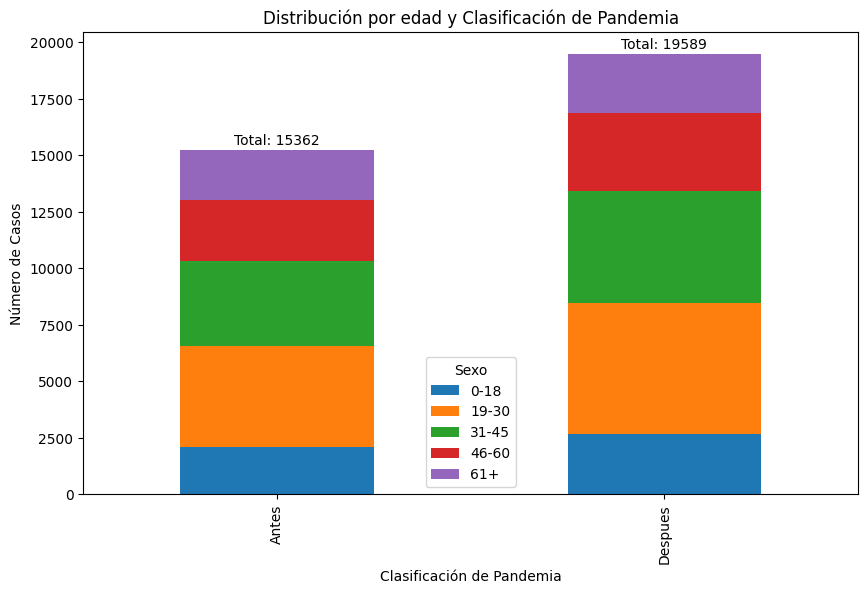

In [34]:

# Agrupa los datos por 'SEXO' y 'CLASIFICACION_PANDEMIA', y cuenta el número de casos en cada grupo
grupo_distribucion = base.groupby(['CLASIFICACION_PANDEMIA', 'GRUPO_EDAD'],  observed=False).size().unstack(fill_value=0)

# Calcula el total de casos por sexo
total_por_edad = base.groupby('CLASIFICACION_PANDEMIA').size()

# Crea un gráfico de barras apiladas
ax = grupo_distribucion.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configura las etiquetas y el título del gráfico
plt.xlabel('Clasificación de Pandemia')
plt.ylabel('Número de Casos')
plt.title('Distribución por edad y Clasificación de Pandemia')

# Agrega una leyenda
plt.legend(title='Sexo')

# Muestra el total de casos por sexo en la parte superior de las barras
for i, total in enumerate(total_por_edad):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

# Muestra el gráfico
plt.show()

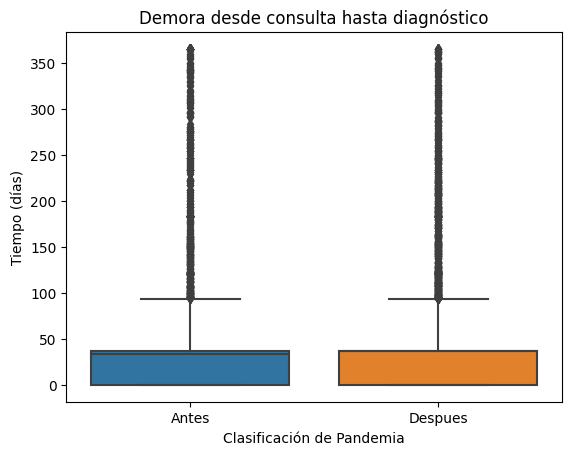

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna 'CLASIFICACION_PANDEMIA' en un tipo de datos categórico en el DataFrame original
base['CLASIFICACION_PANDEMIA'] = base['CLASIFICACION_PANDEMIA'].astype('category')


# Crear el diagrama de caja por categoría
sns.boxplot(x='CLASIFICACION_PANDEMIA', y='TIEMPO_DEMORA', data=base)

# Añadir título y etiquetas a los ejes
plt.title('Demora desde consulta hasta diagnóstico')
plt.xlabel('Clasificación de Pandemia')
plt.ylabel('Tiempo (días)')

# Mostrar el diagrama
plt.show()

TIEMPO DEMORA DESDE QUE EL PACIENTE INICIO CON LOS SINTOMAS HASTA QUE SE DIAGNOSTICO

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Calcular las medidas de tendencia central para cada categoría segun clasificacion
valor_tiempo = round(base.groupby('CLASIFICACION_PANDEMIA')['TIEMPO_DEMORA'].agg(['mean', 'median']),2)


# Imprimir la tabla resumen
valor_tiempo

,mean,median
CLASIFICACION_PANDEMIA,,
Antes,27.56,34.00
Despues,29.22,37.29


In [37]:
# Calcular las medidas de tendencia central (media y mediana) para cada categoría según clasificación y provincia
valor_tiempo = round(base.groupby(['PROVINCIA_RESIDENCIA', 'CLASIFICACION_PANDEMIA'])['TIEMPO_DEMORA'].agg(['mean', 'median']).unstack(), 2)

# Renombrar las columnas
valor_tiempo.columns = ['Media_Antes', 'Media_Despues', 'Mediana_Antes', 'Mediana_Despues']

# Imprimir la tabla resumen
valor_tiempo




,Media_Antes,Media_Despues,Mediana_Antes,Mediana_Despues
PROVINCIA_RESIDENCIA,,,,
*sin dato*,15.79,29.11,0.00,37.29
Buenos Aires,26.72,27.92,37.29,37.29
CABA,32.31,33.72,37.29,37.29
Catamarca,27.87,11.17,37.29,0.00
Chaco,32.77,34.97,37.29,37.29
Chubut,22.93,18.88,8.00,1.00
Corrientes,25.21,14.25,23.50,0.00
Córdoba,28.61,35.29,30.00,31.00
Entre Ríos,35.74,40.92,30.00,31.00


TIEMPO DEMORA DESDE QUE EL PACIENTE INICIO el TRATAMIENTO Y LO TERMINO

aca hay que tener en cuento la distribucion de la variable que se analiza simetrica (normal) asimetrico (no normal) si la media es mayor a la mediana y la moda por lo que se espera una distribución asimétrica a la derecha.

In [38]:
valor_tiempo_tto = round(base.groupby(['PROVINCIA_RESIDENCIA', 'CLASIFICACION_PANDEMIA'])['TIEMPO_DEMORA_TTO'].agg(['mean', 'median']).unstack(), 2)

# Renombrar las columnas
valor_tiempo_tto.columns = ['Media_Antes', 'Media_Despues', 'Mediana_Antes', 'Mediana_Despues']

# Imprimir la tabla resumen
valor_tiempo_tto

,Media_Antes,Media_Despues,Mediana_Antes,Mediana_Despues
PROVINCIA_RESIDENCIA,,,,
*sin dato*,181.86,186.80,205.45,205.45
Buenos Aires,197.25,197.17,205.45,205.45
CABA,205.04,204.54,205.45,205.45
Catamarca,203.88,171.12,205.45,194.50
Chaco,203.17,198.38,205.45,205.45
Chubut,211.53,200.63,205.45,205.45
Corrientes,189.59,180.54,205.45,184.00
Córdoba,207.06,194.14,205.45,205.45
Entre Ríos,190.02,182.04,205.45,201.00


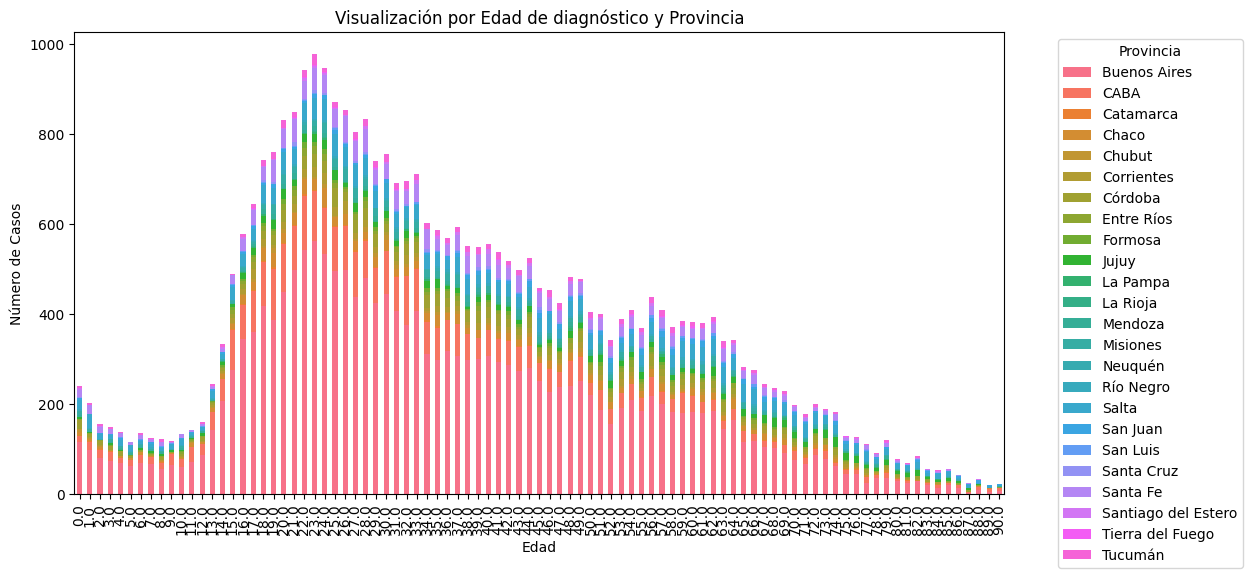

In [39]:
import matplotlib.pyplot as plt

paleta_colores = sns.color_palette('husl', n_colors=len(base['PROVINCIA_RESIDENCIA'].unique()))

# Por edad y provincias, contar las ocurrencias
agrupado = base[(~base['EDAD_DIAGNOSTICO'].isnull()) & (base['PROVINCIA_RESIDENCIA'] != "*sin dato*")].groupby(['EDAD_DIAGNOSTICO', 'PROVINCIA_RESIDENCIA']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
agrupado.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta_colores)
plt.title('Visualización por Edad de diagnóstico y Provincia')
plt.xlabel('Edad')
plt.ylabel('Número de Casos')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


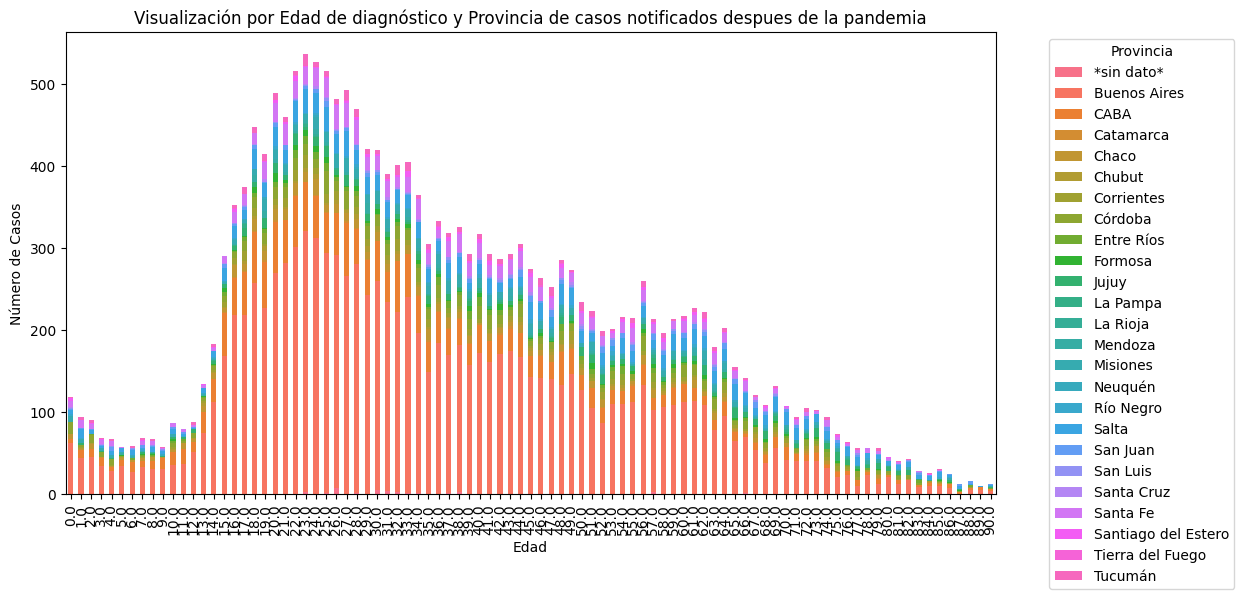

In [40]:
import matplotlib.pyplot as plt

paleta_colores = sns.color_palette('husl', n_colors=len(base['PROVINCIA_RESIDENCIA'].unique()))

# Por edad y provincias, contar las ocurrencias
agrupado = base[(~base['EDAD_DIAGNOSTICO'].isnull()) & (base['CLASIFICACION_PANDEMIA'] == "Despues")].groupby(['EDAD_DIAGNOSTICO', 'PROVINCIA_RESIDENCIA']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
agrupado.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta_colores)
plt.title('Visualización por Edad de diagnóstico y Provincia de casos notificados despues de la pandemia')
plt.xlabel('Edad')
plt.ylabel('Número de Casos')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

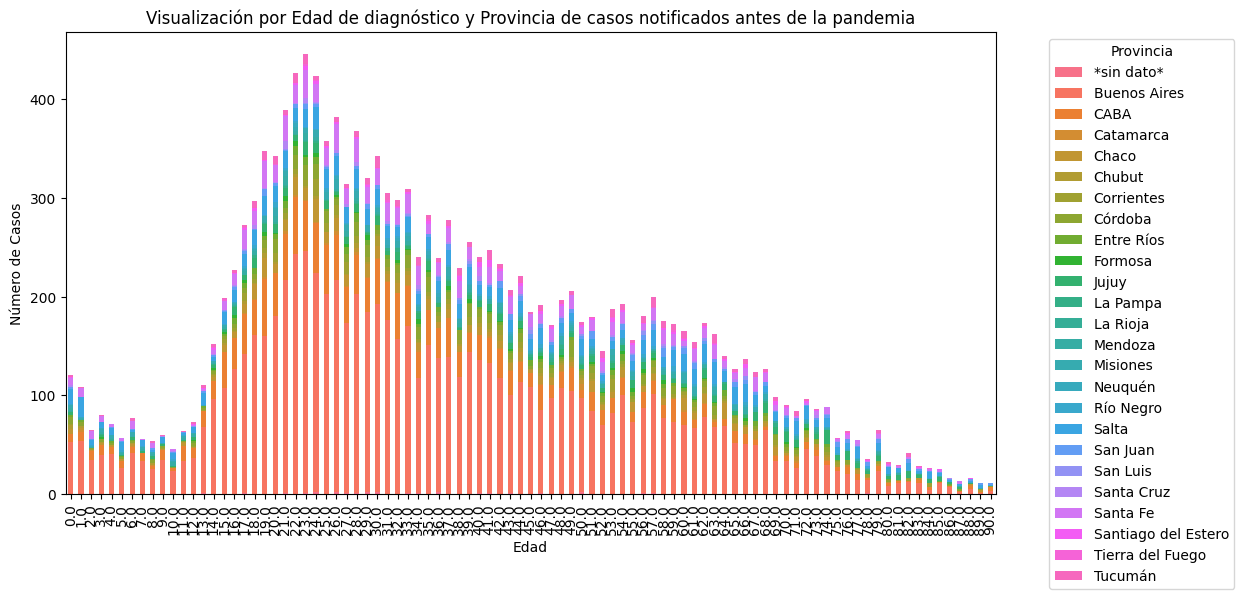

In [41]:
import matplotlib.pyplot as plt

paleta_colores = sns.color_palette('husl', n_colors=len(base['PROVINCIA_RESIDENCIA'].unique()))

# Por edad y provincias, contar las ocurrencias
agrupado = base[(~base['EDAD_DIAGNOSTICO'].isnull()) & (base['CLASIFICACION_PANDEMIA'] == "Antes")].groupby(['EDAD_DIAGNOSTICO', 'PROVINCIA_RESIDENCIA']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
agrupado.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta_colores)
plt.title('Visualización por Edad de diagnóstico y Provincia de casos notificados antes de la pandemia')
plt.xlabel('Edad')
plt.ylabel('Número de Casos')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Podríamos hacer algun gráfico georreferenciado con las localidades de residencia, que opinan?

In [42]:
!pip install contextily
import requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 81.7 MB/s eta 0:00:00


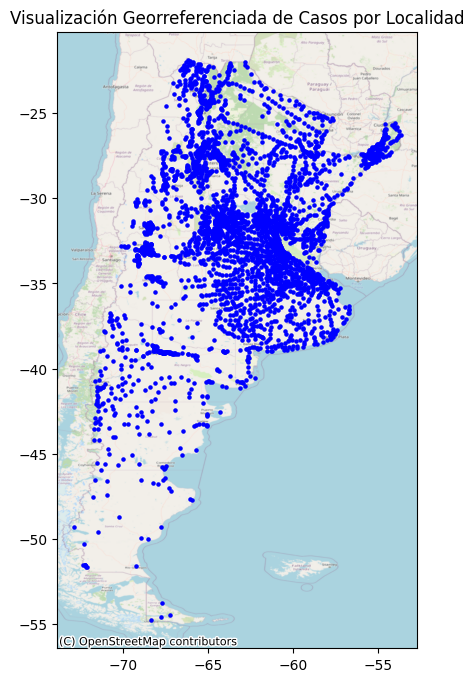

In [43]:
import contextily as ctx

# URL del archivo GeoJSON
url = "https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.31/download/localidades-censales.geojson"

# Descargo el geojson
response = requests.get(url)

# Guardo el archivo
with open("localidades-censales.geojson", "wb") as f:
    f.write(response.content)

# Cargop el archivo GeoJSON
gdf = gpd.read_file("localidades-censales.geojson")

# Fusiono gdf con base usando la columna 'nombre' para fusión
merged = gdf.merge(base, left_on='nombre', right_on='LOCALIDAD_RESIDENCIA')

# mapa de puntos
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker= 'o', color='blue', markersize=5)
ctx.add_basemap(ax, crs=merged.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)


plt.title('Visualización Georreferenciada de Casos por Localidad')
plt.show()


Distribución por provincia, creo que no es muy reveladora

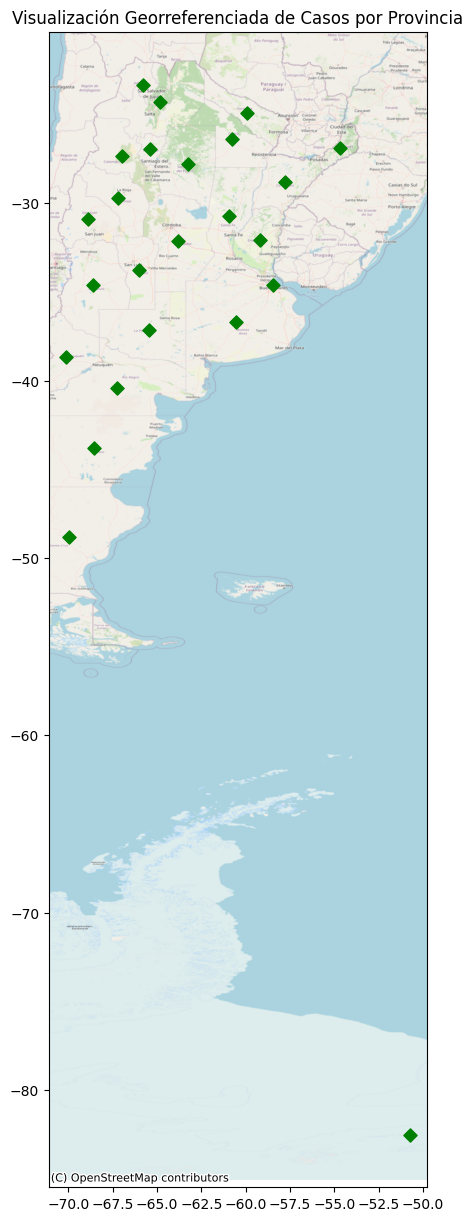

In [44]:
# URL del archivo GeoJSON
url = "https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.12/download/provincias.geojson"

# Descargo el geojson
response = requests.get(url)

# Guardo el archivo
with open("provincias.geojson", "wb") as f:
    f.write(response.content)

# Cargop el archivo GeoJSON
gdf = gpd.read_file("provincias.geojson")

# Fusiono gdf con base usando la columna 'nombre' para fusión
merged = gdf.merge(base, left_on='nombre', right_on='PROVINCIA_RESIDENCIA')

# mapa de puntos
fig, ax = plt.subplots(figsize=(20,15))
gdf.plot(ax=ax, marker= 'D', color='green', markersize=45)
ctx.add_basemap(ax, crs=merged.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('Visualización Georreferenciada de Casos por Provincia')
plt.show()

Georreferencia de cantidad de casos por provincia, voy a modificar la base para que CABA aparezca como Ciudad Autonoma de Buenos Aires

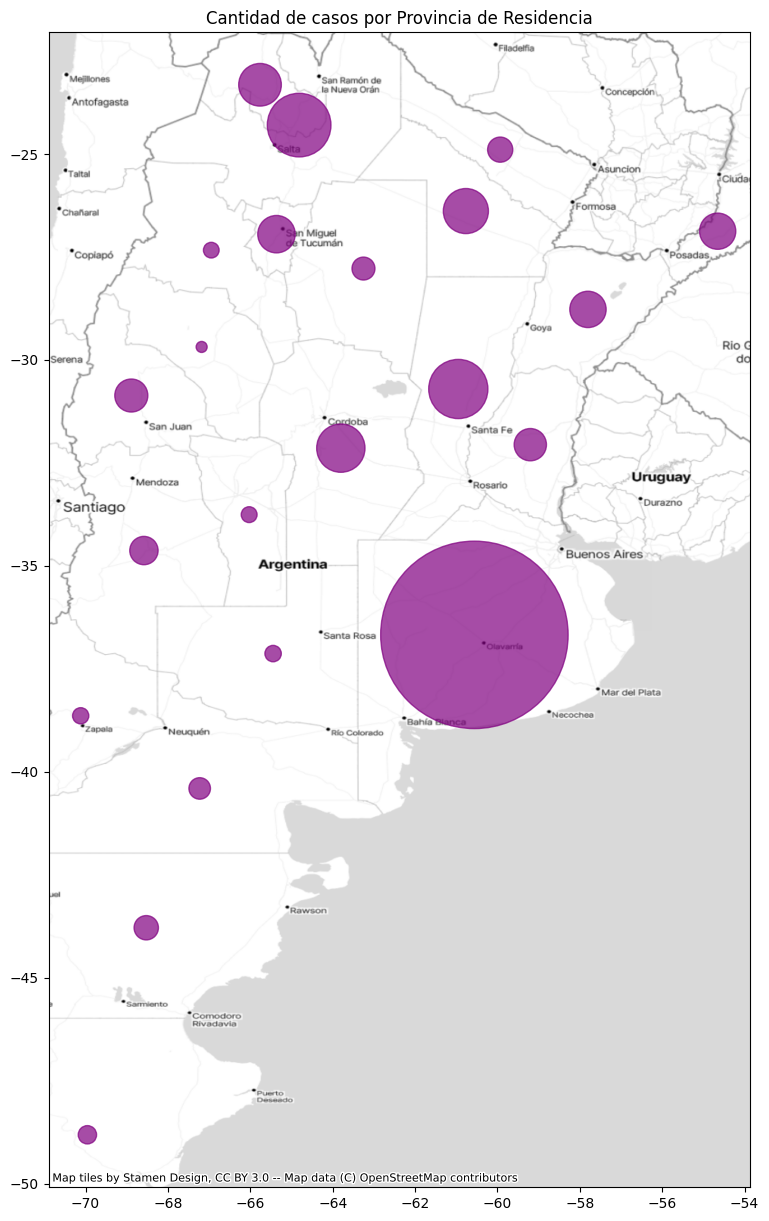

In [45]:

# Realizo el conteo por provincia_residencia en el DataFrame base
conteo_provincias = base['PROVINCIA_RESIDENCIA'].value_counts().reset_index()
conteo_provincias.columns = ['PROVINCIA_RESIDENCIA', 'CANTIDAD']

# Fusiono el GeoDataFrame con los datos de conteo
merged = gdf.merge(conteo_provincias, left_on='nombre', right_on='PROVINCIA_RESIDENCIA')

# Creo gráfico
fig, ax = plt.subplots(figsize=(20,15))

# Escalo según el tamaño de los marcadores según 'CANTIDAD'
scaled_marker_size = merged['CANTIDAD'] * 1

# Graficar el mapa de puntos con el tamaño de los marcadores escalado
merged.plot(ax=ax, color='purple', markersize=scaled_marker_size, alpha=0.7)

# Añadir un mapa de fondo (contextily)
ctx.add_basemap(ax, crs=merged.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

# Título del gráfico
plt.title('Cantidad de casos por Provincia de Residencia')

# Mostrar el gráfico
plt.show()


In [46]:
base_residencia = base[['EDAD_DIAGNOSTICO', 'PROVINCIA_RESIDENCIA', 'CLASIFICACION_PANDEMIA', 'ANIO_NOTIFICACION', 'GRUPO_EDAD']].copy()
base_residencia.tail(20)

,EDAD_DIAGNOSTICO,PROVINCIA_RESIDENCIA,CLASIFICACION_PANDEMIA,ANIO_NOTIFICACION,GRUPO_EDAD
393794,56.0,Entre Ríos,Despues,2021-01-01,46-60
393788,28.0,Buenos Aires,Despues,2021-01-01,19-30
395176,21.0,Buenos Aires,Despues,2021-01-01,19-30
428832,33.0,Buenos Aires,Despues,2021-01-01,31-45
401324,27.0,CABA,Despues,2021-01-01,19-30
448226,39.0,Buenos Aires,Despues,2021-01-01,31-45
445278,29.0,Buenos Aires,Despues,2021-01-01,19-30
448233,54.0,Buenos Aires,Despues,2021-01-01,46-60
465733,15.0,Córdoba,Despues,2021-01-01,0-18
448517,17.0,Buenos Aires,Despues,2021-01-01,0-18


# lo que vienen lo deje para que pensemos que podemos hacer con eso no es necesario todo algo

Antes de hacer el análisis de covarianza, generamos un nuevo df quedándonos sólo con las variables que consideramos que más aportan al análisis


In [47]:
base.columns

Index(['ID_EVENTO', 'FECHA_APERTURA', 'SEPI_APERTURA', 'FECHA_PAPEL', 'SEXO',
       'NRO_DOC', 'FECHA_NACIMIENTO', 'EDAD_DIAGNOSTICO', 'IDPAISRESIDENCIA',
       'PAIS_RESIDENCIA', 'ID_PROV_INDEC_RESIDENCIA', 'PROVINCIA_RESIDENCIA',
       'ID_DEPTO_INDEC_RESIDENCIA', 'DEPARTAMENTO_RESIDENCIA',
       'ID_LOC_INDEC_RESIDENCIA', 'LOCALIDAD_RESIDENCIA', 'CALLE_DOMICILIO',
       'NUMERO_DOMICILIO', 'PAIS_NACIMIENTO', 'PERS_PRIV_LIBERTAD',
       'SERVICIO_PENITENCIARIO', 'CLASIFICACION_MANUAL',
       'CLASIFICACION_AUTOMATICA', 'SEPI_SINTOMA', 'FECHA_CONSULTA',
       'SEPI_CONSULTA', 'FECHA_INICIO_SINTOMA', 'EMBARAZADA', 'INTERNADO',
       'FECHA_INTERNACION', 'ID_SNVS_SIGNO_SINTOMA', 'SIGNO_SINTOMA',
       'CLASIFICACION_EXTRAPULMONAR', 'FIS', 'SEPI_MUESTRA', 'FTM',
       'FECHA_ESTUDIO', 'DETERMINACION', 'RESULTADO', 'FECHA_RECEPCION',
       'ID_ESTABLECIMIENTO_DIAG', 'ESTABLECIMIENTO_DIAG', 'ID_LOC_INDEC_DIAG',
       'LOCALIDAD_DIAG', 'ANTECEDENTE_EPIDEMIOLOGICO',
       'TIPO

<Axes: xlabel='TIEMPO_DEMORA_TTO', ylabel='TIEMPO_DEMORA'>

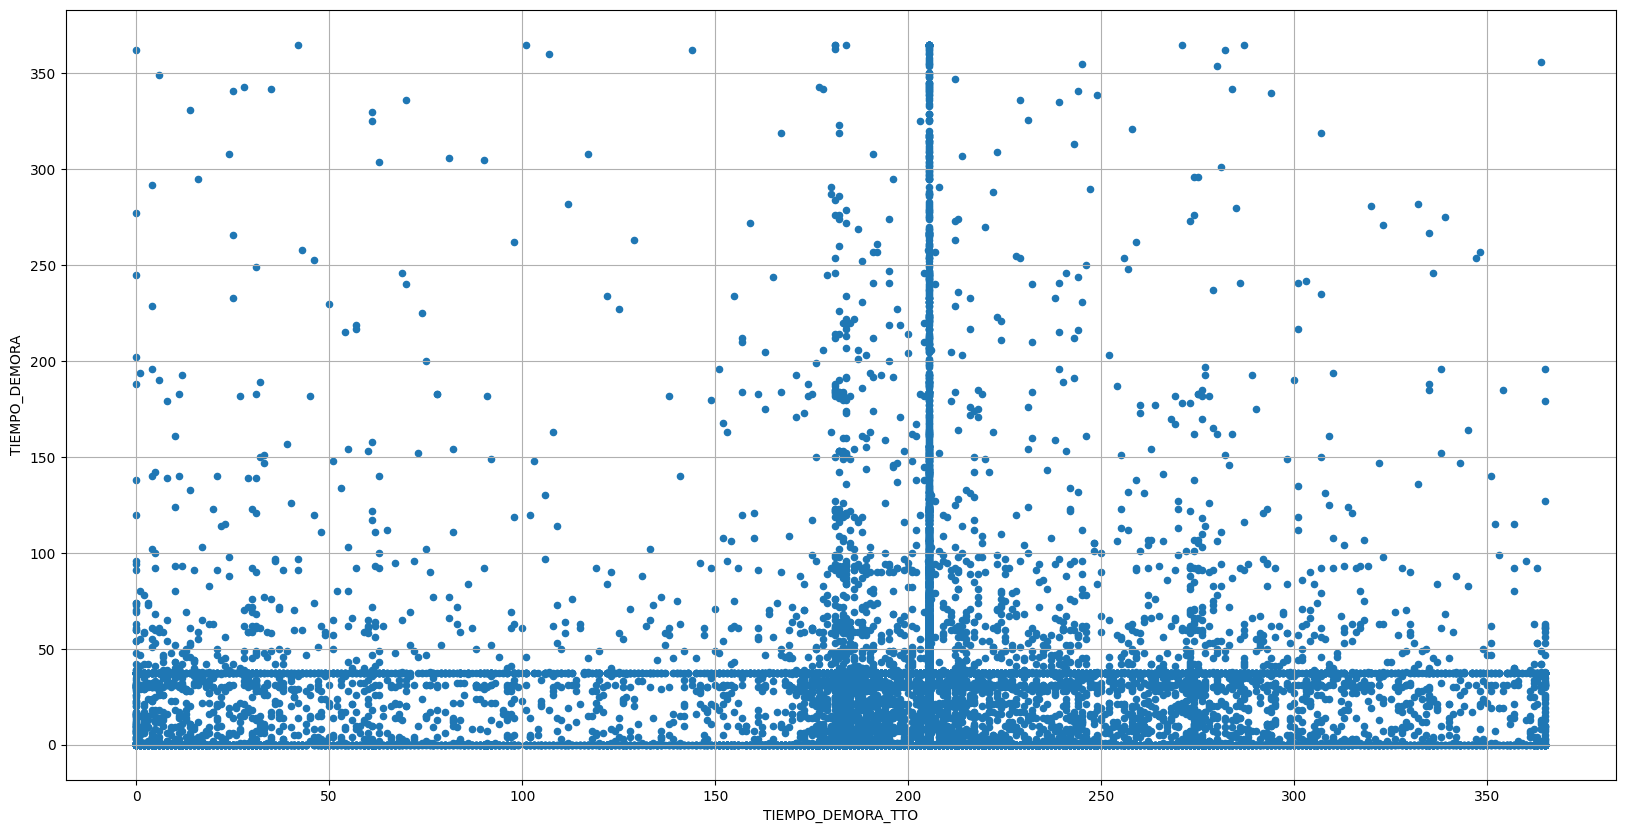

In [48]:
base.plot(kind='scatter',x='TIEMPO_DEMORA_TTO',y='TIEMPO_DEMORA',grid=True,figsize=(20,10))

In [49]:
df_cuantitativas =base[['TIEMPO_DEMORA', 'TIEMPO_DEMORA_TTO','EDAD_DIAGNOSTICO']]

Análisis de covarianza entre las variables.
Del análisis de la covarianza se puede ver que edad tiene una covarianza positiva con tiempo de demora del diagnostico y negativa con tiempo de demora del trataeminto (MAYOR EDAD MENOR TIEMPO TTO Y MAYOR EDAD MAYOR TIEMPO DE DIAGNOSTICO??)

<Axes: >

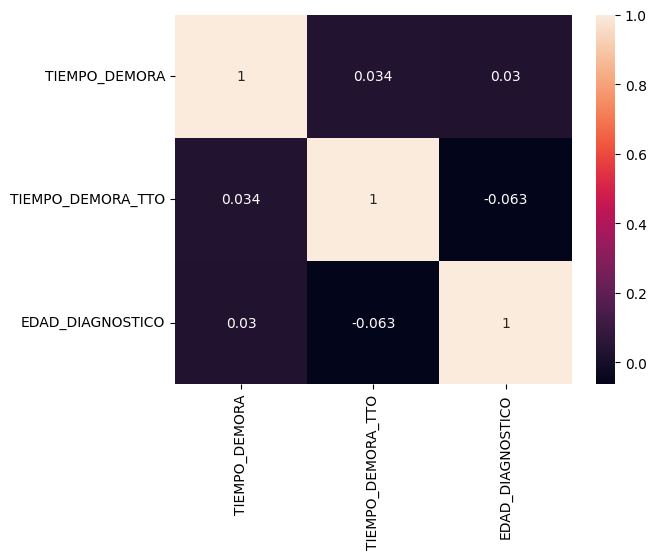

In [50]:
sns.heatmap(df_cuantitativas.corr(),annot=True)

3. Aprendizaje supervisado:

Para predecir la demora en el diagnóstico.

Regresión lineal multivariado
Aplicamos un modelo de regresión lineal MULTIVARIADO buscando predecir el teimpo de demora del tratamiento según la edad del paciente y tiempo de demora del diagnostico

In [51]:
#Importamos el módulo que necesitamos
import statsmodels.formula.api as smf

#Construimos el modelo.
lm = smf.ols(formula='TIEMPO_DEMORA_TTO''~EDAD_DIAGNOSTICO + TIEMPO_DEMORA',data=df_cuantitativas).fit()

In [52]:
y = np.array(df_cuantitativas['TIEMPO_DEMORA_TTO'])

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      TIEMPO_DEMORA_TTO   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     93.60
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           2.88e-41
Time:                        15:07:14   Log-Likelihood:            -1.9218e+05
No. Observations:               34951   AIC:                         3.844e+05
Df Residuals:                   34948   BIC:                         3.844e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          203.0153      0.737  

El valor de *R-cuadrado *es 0.005, lo que significa que aproximadamente el 0.5% de la variabilidad de la variable "demora en el tratamiento", esto se explicaría por las variables incluidas en el modelo.

El *R-cuadrado ajustado *es 0.005, lo que indica que el ajuste del modelo no mejora al considerar el número de variables y observaciones.

El valor p es muy pequeño (2.88e-41), lo que indica que hay evidencia significativa para rechazar la hipótesis nula de que no hay relación lineal entre las variables independientes y la variable dependiente. ENTONCES QUIERE DECIR QUE HAY RELACION ENTRE LA DEMORA EN EL TRATAMIENTO AL EDAD DEL PACIENTE Y EL TIEMPO EN QUE DEMORO EN SER DIAGNOSTICADO



---



---


**Bosques aleatorios para árboles de regresión.**


---

---


In [54]:
#Vamos a buscar el método adecuado
from sklearn.ensemble import RandomForestRegressor

In [55]:
#Generamos nuestra instancia
#En el parámetro n_estimators le decimos la cantidad de árboles aleatorios queremos que genere.
forest1= RandomForestRegressor(n_jobs=2,oob_score=True,n_estimators=5000)

In [56]:
tipos_a_mantener = ['int64', 'float64']

# Seleccionar las columnas que son de los tipos especificados
X = X.select_dtypes(include=tipos_a_mantener)
y = base['TIEMPO_DEMORA']  # Definir la columna objetivo

NameError: ignored

In [ ]:
X = X.dropna(axis=1)

In [ ]:
y = y.dropna()

In [ ]:
#Ajustamos nuestro modelo
forest1.fit(X,y)

In [ ]:
#Podemos ver nuestras predicciones.
forest1.oob_prediction_[:10]

In [ ]:
print(" El r2 del modelo es: " , forest1.score(X, y))

El R2 de los bosques aleatorios para árbol de regresión nos da 0.85 es decir que aproximadamente el 85 % de la variabilidad de los valores de respuesta se explica por las variables predictoras utilizadas en el modelo.

Esta alta proporción de variabilidad sugiere que el modelo de bosques aleatorios tiene un buen ajuste a los datos y es capaz de capturar la relación entre las variables predictoras y la de respuesta.

En otras palabras, el modelo es capaz de predecir con bastante precisión los valores de la variable de respuesta basándose en las variables predictoras.


---


**Clasificación - KNN**


---


El algoritmo k-NN es un método de aprendizaje supervisado que clasifica los puntos de datos en función de la mayoría de votos de sus k vecinos más cercanos en el espacio de características. Es sencillo de entender e implementar, y puede funcionar bien en conjuntos de datos pequeños. Sin embargo, puede ser computacionalmente costoso para conjuntos de datos grandes y puede no funcionar bien cuando los datos tienen características irrelevantes o ruido.
Los algoritmos de clasificación se utilizan cuando el resultado deseado es una etiqueta discreta.

In [ ]:
#Importamos las librerias necesarias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import preprocessing,neighbors

In [ ]:
base.columns

##me da error tengo que ver que es

In [ ]:
#Seleccionemos la variable preparamos los datos

Y = base['CLASIFICACION_PANDEMIA']

X = base[['TIEMPO_DEMORA', 'TIEMPO_DEMORA_TTO', 'EDAD_DIAGNOSTICO']]

#Veamos nuestras variables para
X.shape

In [ ]:
Y.shape

In [ ]:
Y.unique()

In [ ]:
#Dividimos el conjunto de datos para entrenar nuestro modelo
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
#Generamos nuestra instancia de modelo # N_neighbors determinar el K del KNN a entrenar.
#se utiliza una métrica de distancia apropiada para variables categóricas, como la distancia de Hamming
#o la distancia de Jaccard.
clf = neighbors.KNeighborsClassifier(n_neighbors=5)

In [ ]:
#Veamos la precisión
accuracy = clf.score(X_test,y_test)
accuracy

Una precision de 0,22 podemos decir que el resultado no es bueno, es decir que el modelo predijo correctametne solo el 22% de los barrios

Enntoces probamos con otras modelos o tecnicas como arboles o bosques son algoritmos de clasificación que pueden ser útiles en problemas de predicción de etiquetas discretas.

In [ ]:
from sklearn.impute import SimpleImputer  # Importar el imputador

# Dividir los datos en conjunto de entrenamiento y prueba
X = base[['EDAD_DIAGNOSTICO']]  # Característica de entrada (en este caso, edad de diagnóstico)
y = base['TIEMPO_DEMORA']  # Variable objetivo (tiempo de diagnóstico)

# Imputar valores faltantes en 'y' usando la media
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1))

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el rendimiento del modelo
score = model.score(X_test, y_test)
print(f'R-cuadrado del modelo: {score}')




4. Aprendizaje no supervisado:

El aprendizaje no supervisado puede ser útil para identificar patrones en los datos. Podrías usar técnicas de clustering como K-means para agrupar pacientes en función de características similares, lo que podría ayudar a identificar subgrupos de pacientes con demoras similares en el diagnóstico.

In [ ]:
# Supongamos que deseas agrupar en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
base['Cluster'] = kmeans.fit_predict(X)

# Visualizar los clusters
sns.scatterplot(data=base, x='EDAD_DIAGNOSTICO', y='TIEMPO_DEMORA', hue='Cluster')
plt.xlabel('Edad de Diagnóstico')
plt.ylabel('Tiempo demora')
plt.show()
